<a href="https://colab.research.google.com/github/alero11/practica_2_auto_usado/blob/main/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICA 2. Prediccion precio autos usados**

<img src="https://www.neuraldojo.org/media/bg_car.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

##**Alex Rolando Toro Benitez**     

**Contexto**

Con el aumento en la variedad de automóviles con capacidades y características diferenciadas, como modelo, año de producción, categoría, marca, tipo de combustible, volumen del motor, millaje, cilindros, color, bolsas de aire y muchos más, presentamos un desafío de predicción de precios de automóviles para todos. Todos aspiramos a tener un automóvil dentro del presupuesto con las mejores características disponibles. Para resolver el problema del precio, hemos creado un conjunto de datos de 19237 para el conjunto de datos de entrenamiento y 8245 para el conjunto de datos de prueba.

Descripción de datos
Train.csv: 19237 filas x 18 columnas (incluye columnas de precio como destino)

**Atributos**
- IDENTIFICACIÓN
- Precio: precio de la atención (columna de destino)
- Exacción
- Fabricante
- Modelo
- Año
- Categoría
- Interior de cuero
- Tipo de combustible
- Volumen del motor
- Kilometraje
- Cilindros
- Tipo de caja de cambios
- Ruedas motrices
- puertas
- Rueda
- Color
- bolsas de aire

##Objetivo de la practica

- Parte 1. En un Notebook construya un modelo para predecir el precio de un auto usado.
- Parte 2. Publique y comparta su Notebook en [Github.com](https://www.github.com)
- Parte 3. En base al trabajo desarrollado y los hallazasgos redacte, publique y comparta un articulo en [medium.com](https://www.medium.com)

##Criterios de Evaluación

Parte 1.

- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado (probar al menos tres algoritmos)
    - Evaluación (al menos dos métricas)
    - Hypertunning con Gridsearch
    - Selección del Modelo
    - Resultados y Conclusiones

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 
- Demuestre una ejecución y salida exitosas del código, sin errores.
- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

Parte 2.

El repositorio en Github debe conteener:
- El cuaderno *.ipynb
- README.md, que explique el problema, una descripcion del dataset, requerimientos y librerias para la correcta ejecución del codigo, Resultados y conclusiones
- Licencia del codigo

Parte 3.

El articulo en medium debera contener las siguientes secciones:

- Introduccion
- Problema
- Analisis Exploratorio explicando aspectos relevantes de lo encontrado
- Modelado ML
- Evaluación y Hipertunning
- Resultados y Conclusiones
- Incluir referencia on enlace al codigo disponible en su cuenta github.

##Dataset

Puede descargar el dataset aqui: https://neuraldojo.org/media/carprice/archive.zip

##Método de Entrega del trabajo:

Enviar e mi correo: necrus.aikon@gmail.com, Asunto: Practica 2 (Stroke) lo siguiente:
- Enlace o archivo adjunto del codigo en colab
- Enlace github
- Enlace medium


## 1.- Identificación del problema

En base a la variedad de automóviles con capacidades y características diferenciadas, con diferentes caracteristicas como ser: cilindros, color, bolsas de aire y muchos más, tratar de realizar una predccion que nos permite obtener un automovil del presupuesto con las mejores características disponibles

## 2.- Importación de datos

In [1]:
#importamos las librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import datetime
from sklearn.model_selection import train_test_split

In [3]:
#Importamos el Dataset
!wget https://neuraldojo.org/media/carprice/archive.zip
!unzip archive.zip

--2022-04-13 03:36:14--  https://neuraldojo.org/media/carprice/archive.zip
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606314 (592K) [application/zip]
Saving to: ‘archive.zip.1’

archive.zip.1       100%[===================>] 592.10K   675KB/s    in 0.9s    

2022-04-13 03:36:16 (675 KB/s) - ‘archive.zip.1’ saved [606314/606314]

Archive:  archive.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [2]:
#cargamos los datos en un dataframe
df = pd.read_csv('train.csv')
df.shape

(19237, 18)

## 3.- Analisis de los datos (EDA)

### 3.1 Inspección y Manipulación de los datos

In [5]:
# Reemplazamos valores para que sean solo numeros
df['Mileage']=[re.sub(r'\D*','',str(x)) for x in df['Mileage']]
#Eliminamos carros con kilometraje vacio
df=df[df['Mileage']!='']
df.Mileage=df.Mileage.apply(int)

In [67]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [68]:
#revisemos los tipo de datos de  nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### 3.2 Verificación de valores nulos

In [69]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### 3.3 Análisis Univariable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


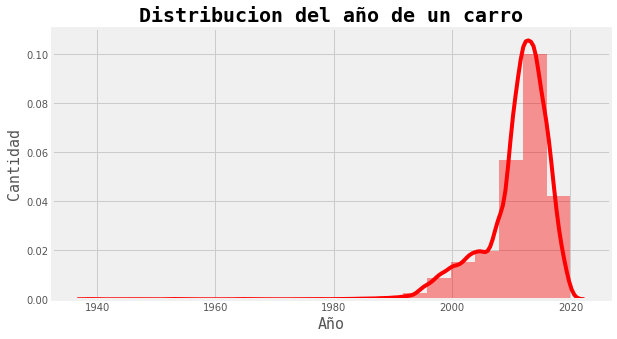

In [70]:
# Distribucion de los anos de un carro
carro_anio = df['Prod. year'].value_counts()
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['Prod. year'], bins=20, color='r')
plt.title('Distribucion del año de un carro', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Año', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4304 missing from current font.
  font.set_text(s, 0.0, flags=flags)

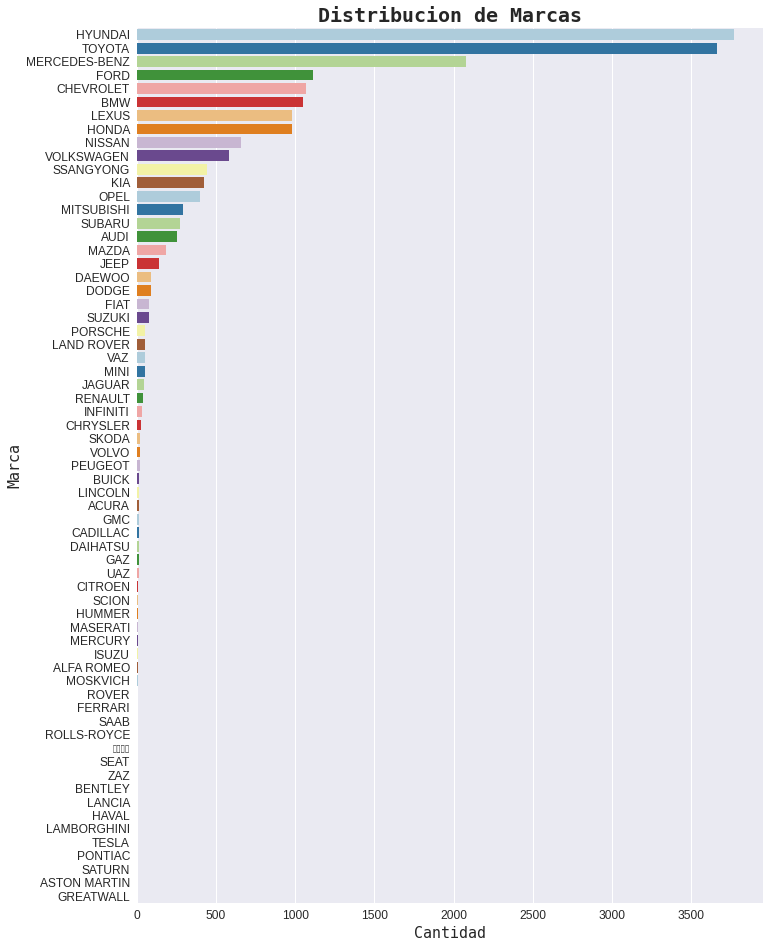

In [71]:
# Distribucion de los fabricantes (marcas)
marca = df['Manufacturer'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10,15))
sns.barplot(marca.values, marca.index, palette='Paired')
plt.title('Distribucion de Marcas', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Cantidad', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Marca', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

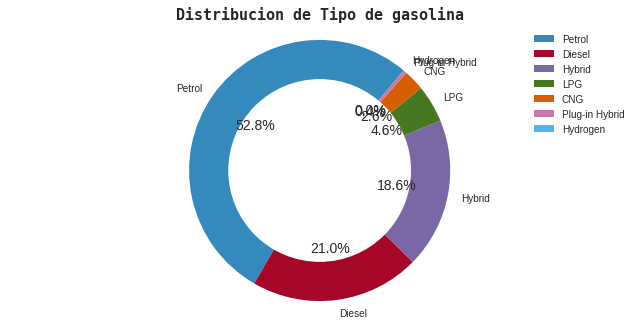

In [72]:
# Una torta de distribucion del tipo de gasolina
tipo_gas = df['Fuel type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(10, 5))
plt.pie(tipo_gas.values, labels=tipo_gas.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribucion de Tipo de gasolina', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 10})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


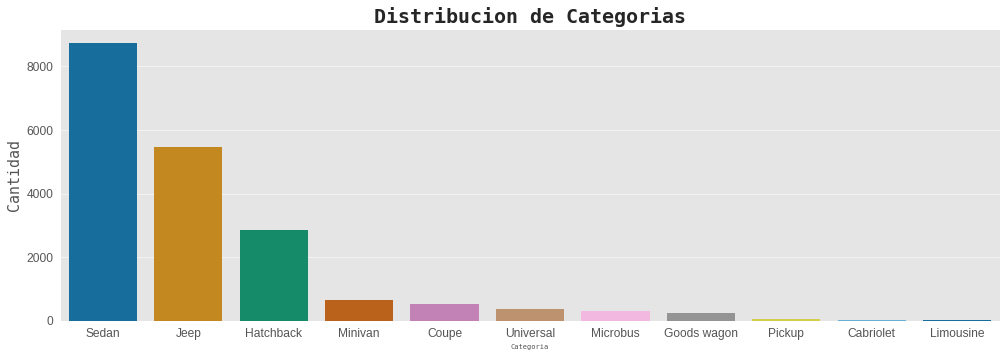

In [74]:
# Distribuion de las categorias
categoria = df['Category'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
sns.barplot(categoria.index, categoria.values, palette='colorblind')
plt.title('Distribucion de Categorias', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Categoria', fontdict={
           'fontname': 'Monospace', 'fontsize': 7})
plt.ylabel('Cantidad', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [81]:
# Distribuion de los kilometros
kilometros = df['Mileage'].value_counts()
print(kilometros)

0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: Mileage, Length: 7687, dtype: int64


### 3.4 Análisis Multivariable

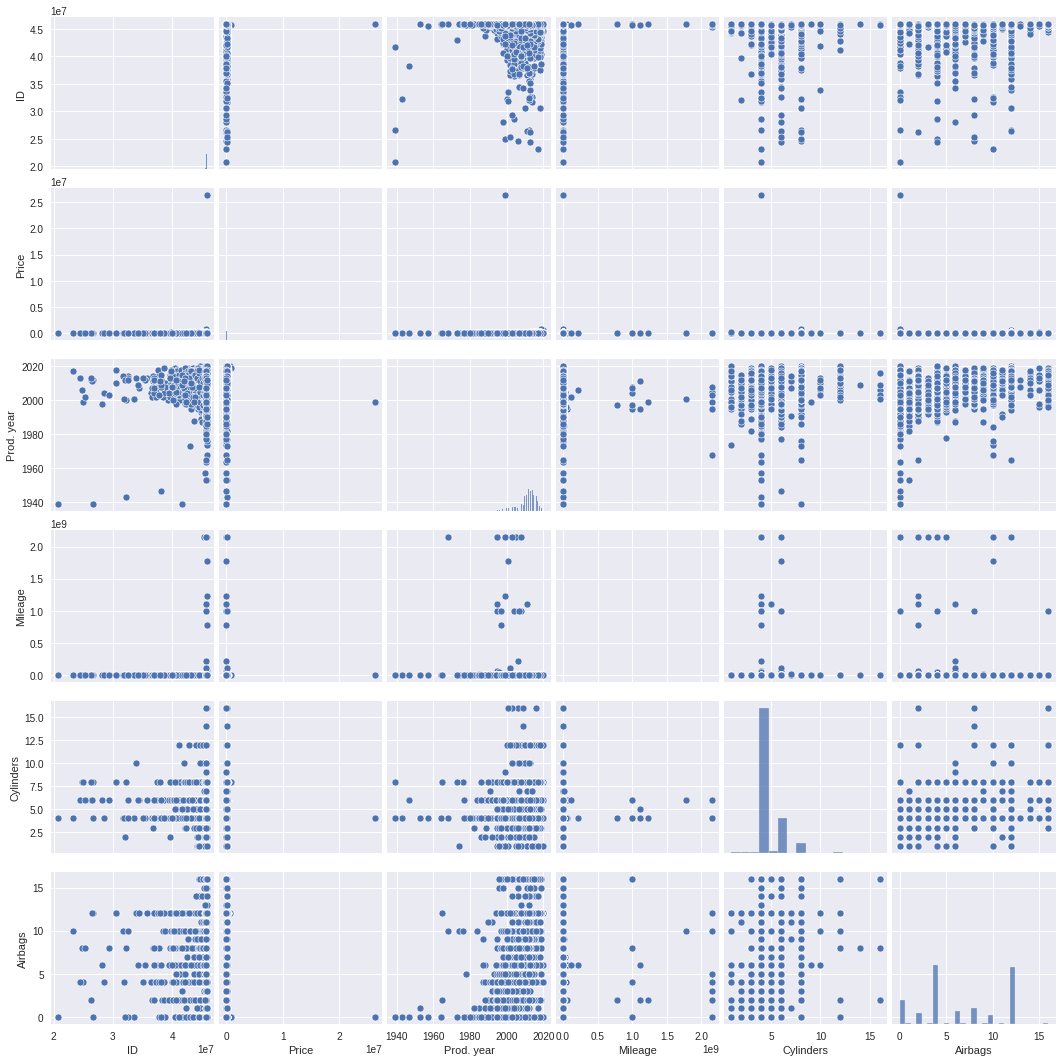

In [95]:
#Pairplot
sns.pairplot(df)

## 4.- Modelado (probar al menos tres algoritmos)

### 4.1 Manipulación de datos

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# eliminamos que no contribuyen con la información especifica 
df.drop(['ID','Airbags','Wheel','Leather interior'], axis=1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Black
2,8467,-,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Black
3,3607,862,FORD,Escape,2011,Jeep,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,White
4,11726,446,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Silver
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Red
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Grey
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Black


In [5]:
#Label Encoder
#A diferencia del método get_dummies(), label encoder convierte las columnas categoricas en valor númerico
from sklearn.preprocessing import LabelEncoder
df_train = df.sample(frac= .8)

In [6]:
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_train[col] = encoder.fit_transform(df_train[col])
df_test = df_train.drop(['ID','Airbags','Wheel','Drive wheels'], axis=1)


In [7]:
#Dividimos nuesros datos train, validation and test
X = df_train.drop('Price', axis = 1)
y = df_train['Price']

X_test = df_test.drop('Price', axis = 1)
y_test = df_test['Price']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)

### 4.2 Regresión Lineal


In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)
reg.score(X_valid,y_valid)

0.20067163419562717

In [14]:
print("Coef:",reg.coef_)
print("Intercept:", reg.intercept_)

Coef: [-5.68672951e-04 -1.11913646e+01 -5.07081752e+01  1.81361611e+00
  1.30414069e+03 -7.28101105e+02  1.18674847e+03 -5.03610548e+02
  2.21694658e+02  7.36058667e-01 -4.31170850e+02  4.41953905e+03
  1.65233396e+03 -1.75842522e+00 -6.01154618e+03 -2.05958586e+01
 -7.66977091e+02]
Intercept: -2578277.441309844


### 4.3 Arbol de decisiones

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf = 5)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [25]:
#Imprimimos Scores
print("Train Score:", clf_dt.score(X_train,y_train))

Train Score: 0.05523066926575698


## 5.- Evaluación (al menos dos métricas)

### 5.1 Error medio cuadrado

In [16]:
from sklearn.metrics import mean_squared_error

#For validation values
mse = mean_squared_error(y_valid, reg.predict(X_valid))
rmse = np.sqrt(mse)

print("Validation MSE:",mse)
print("Validation RMSE:",rmse)


Validation MSE: 261424593.44723564
Validation RMSE: 16168.62991868005


### 5.2 Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = clf_dt, X = X_train, y = y_train, cv = 5)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.04640371, 0.04083527, 0.04222738, 0.03899721, 0.04317549])

## 6.- Resultados y Conclusiones


In [17]:
X_test.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Color
14394,456,16,576,2012,4,1,2,44,6363,4.0,0,1,2
15271,309,30,360,2015,3,1,2,30,500,4.0,0,1,7
3052,0,51,932,2011,10,0,5,31,2270,4.0,1,1,12
7665,0,39,794,2013,4,1,5,27,644,4.0,2,1,14
8470,22,55,327,2018,4,1,5,34,4556,4.0,0,1,12


In [21]:
data_pred=reg.predict(X_valid)

Text(0, 0.5, 'Prediction')

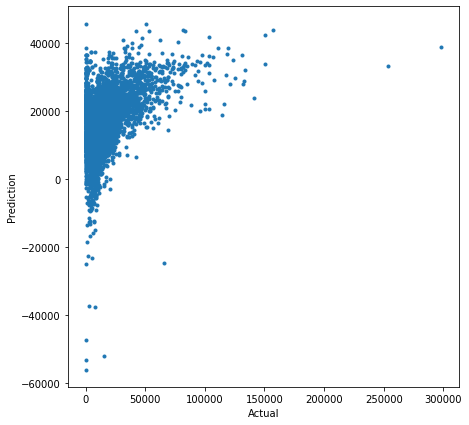

In [22]:
plt.figure(figsize=(7,7))
plt.plot(y_valid,data_pred,'.')
plt.xlabel("Actual")
plt.ylabel("Prediction")

## 7.- Github

Incluir referencia on enlace al codigo disponible en su cuenta github

https://github.com/alero11/practica_2_auto_usado 